In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('kc-house-data.csv')

**Изучите стоимости недвижимости**

In [ ]:
print(df['price'].median())

450000.0


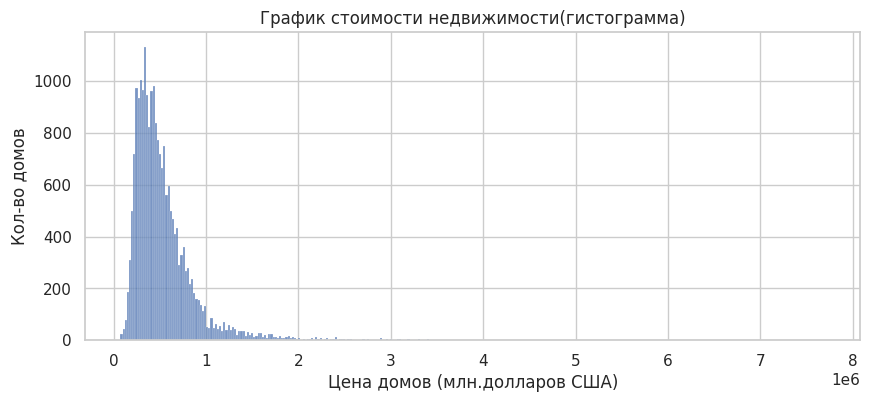

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='price')
sns.set_theme(style="ticks")
plt.title('График стоимости недвижимости(гистограмма)')
plt.xlabel('Цена домов (млн.долларов США)')
plt.ylabel('Кол-во домов')
plt.show();

Исходя из данного графика, можно сделать вывод о том, что основная масса домов находится в ценовой категории "до 1 млн.долларов США".

Рассмотрим влияние возможности выхода к набережной на стоимость домов.

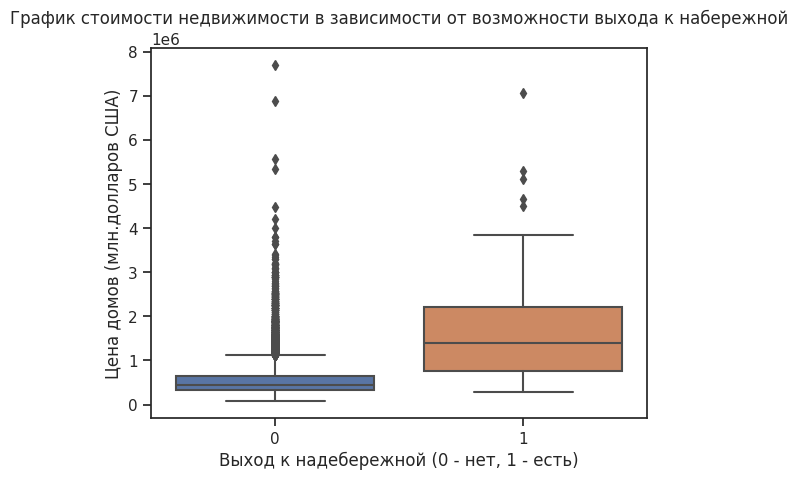

In [ ]:
sns.boxplot(x=df['waterfront'],y=df['price'], whis=1.5)
sns.set_theme(style="whitegrid")
plt.title('График стоимости недвижимости в зависимости от возможности выхода к набережной')
plt.xlabel('Выход к надебережной (0 - нет, 1 - есть)')
plt.ylabel('Цена домов (млн.долларов США)')
plt.show();

В данном случае, можно сделать вывод о том, что стоимость домов не имеющих выхода к набережной значительно ниже стоимости домов, в которых выход к набережной имеется.

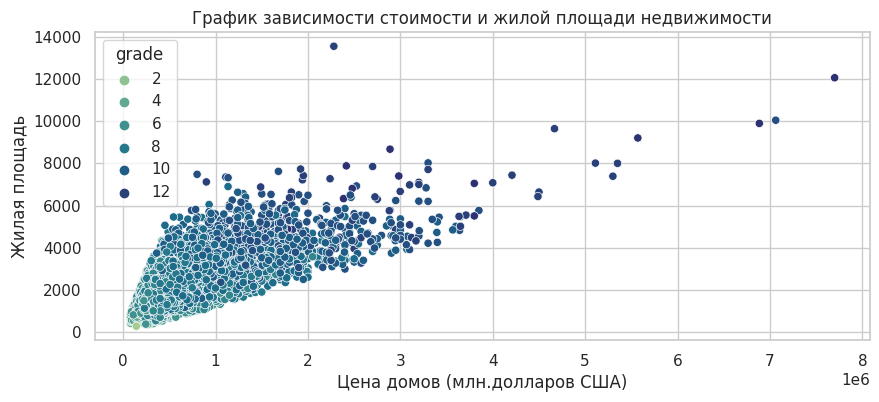

In [ ]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df,
                x='price',
                y='sqft_living',
                hue='grade',
                palette="crest"
                )
plt.title('График зависимости стоимости и жилой площади недвижимости')
plt.xlabel('Цена домов (млн.долларов США)')
plt.ylabel('Жилая площадь')
plt.show();

Очевидно, что чем больше жилая площадь недвижимости и выше класс, тем больше стоит дом.

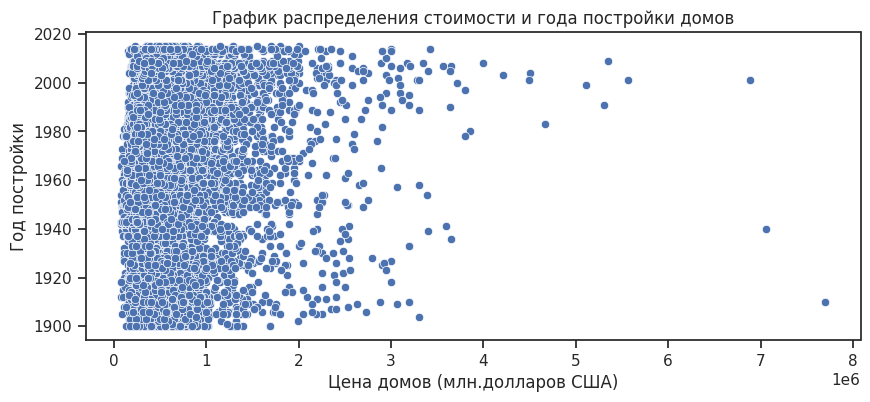

In [ ]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df,
                x='price',
                y='yr_built'
                )
plt.title('График распределения стоимости и года постройки домов')
plt.xlabel('Цена домов (млн.долларов США)')
plt.ylabel('Год постройки')
plt.show();

Подитожим: основное количество домов не имеет выхода к набережной и находится в ценовом диапазоне до 1 млн.долларов США. Возможность выхода к набережной ведет к значительному удорожанию объекта. Также, на его стоимость влияют класс и размер его жилой площади. А вот год постройки особого влияния на стоимость недвижимоси не оказывает.

**Изучите распределение квадратуры жилой площади**

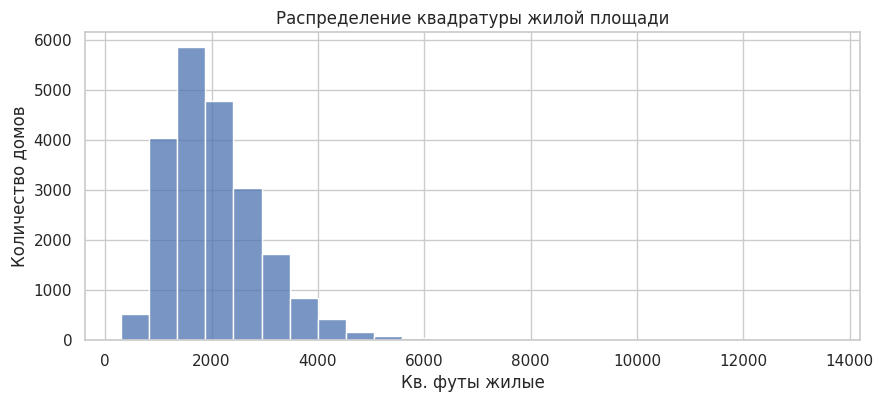

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['sqft_living'], bins=25)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Кв. футы жилые')
plt.ylabel('Количество домов');

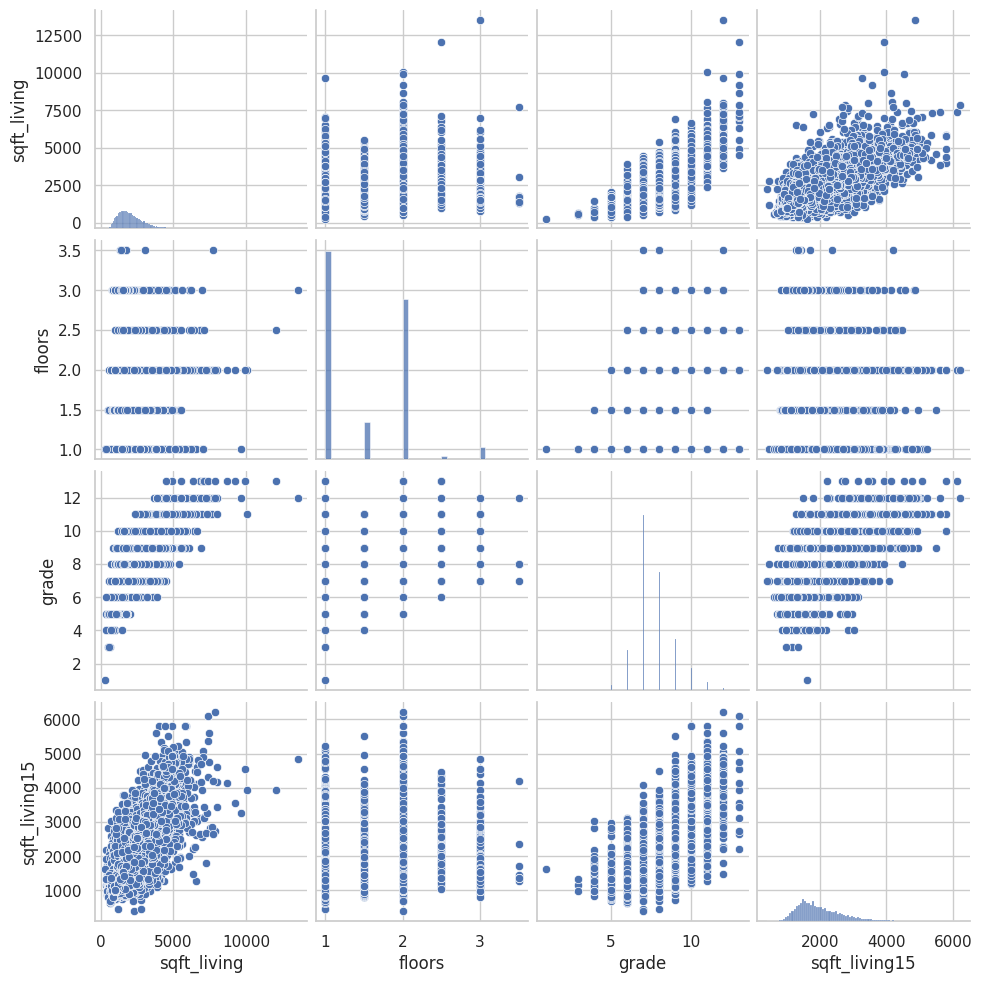

In [ ]:
df_sqft_living = df[['sqft_living', 'floors', 'grade', 'sqft_living15']]
sns.pairplot(df_sqft_living);

Квадратура жилой площади не зависит от этажности дома (за исключением логического минимума). Однако можно заметить, что чем выше класс дома, тем болше его жилая площадь. Также, можно заметить некоторое влияние на жилую площадь объекта размера жилой площади 15 соседей. Вероятно, это дома в кварталах или кондоминиумах.

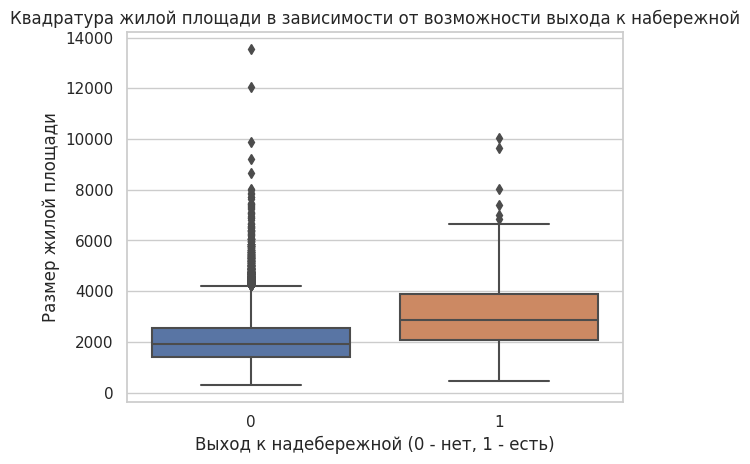

In [ ]:
sns.boxplot(x=df['waterfront'],y=df['sqft_living'], whis=1.5)
sns.set_theme(style="whitegrid")
plt.title('Квадратура жилой площади в зависимости от возможности выхода к набережной')
plt.xlabel('Выход к надебережной (0 - нет, 1 - есть)')
plt.ylabel('Размер жилой площади')
plt.show();

Можно заметить, что медианная квадратура жилой площади дома, имеющего выход к набережной, выше медианной квадратуры жилой площади тех домов, в которых такого выхода нет. Из чего можно сделать вывод, что в данном датафрейме, на береговой линии преобладают дома частной застройки, а не многоквартирное строительство.

**Изучите распределение года постройки**

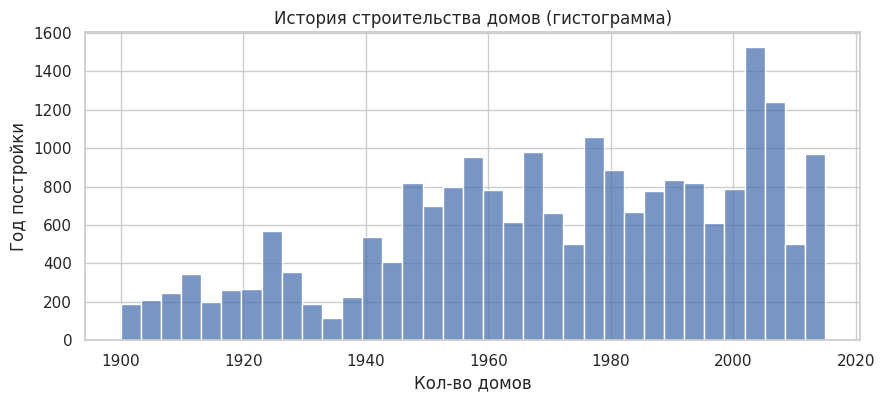

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='yr_built')
sns.set_theme(style="ticks")
plt.title('История строительства домов (гистограмма)')
plt.xlabel('Кол-во домов')
plt.ylabel('Год постройки')
plt.show();

Очевидно, что темпы строительства домов растут (с переменным успехом). Наибольшее кол-во построенных объектов за год было в 2004 году, наименьшее - в 1935 году.

**Изучите распределение домов от наличия вида на набережную**

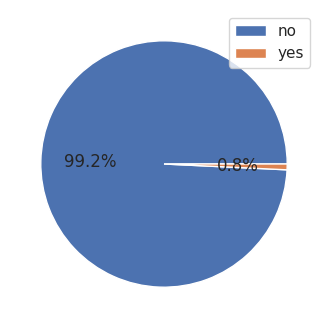

In [ ]:
df_waterfront = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(df_waterfront, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

**Изучите распределение этажей домов**

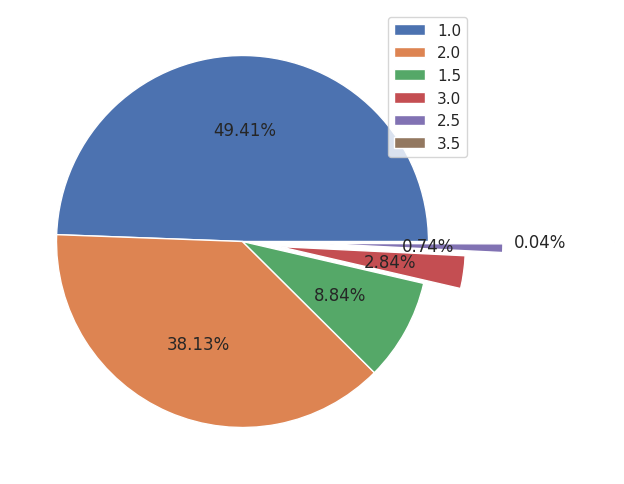

In [ ]:
df_floors = df['floors'].value_counts()
plt.figure(figsize=(6, 10))
explode=[0, 0, 0, 0.2, 0.4, 1]
plt.pie(df_floors, autopct='%1.2f%%', explode=explode)
plt.legend(df['floors'].unique());

**Изучите распределение состояния домов**

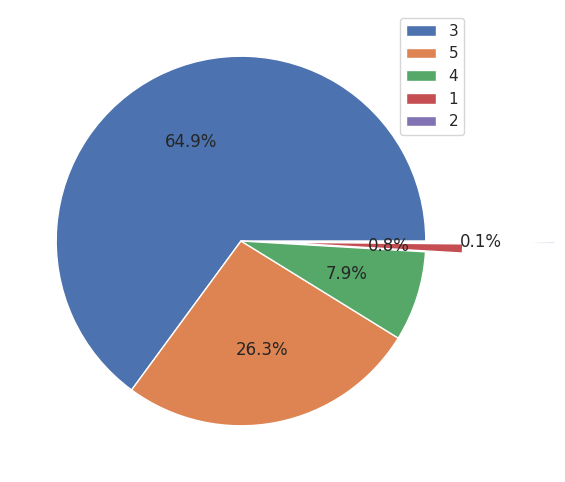

In [ ]:
df_condition = df['condition'].value_counts()
plt.figure(figsize=(6, 6))
explode=[0, 0, 0, 0.2, 0.7]
plt.pie(df_condition, autopct='%1.1f%%', explode=explode)
plt.legend(df['condition'].unique());

**Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.**

Рассмотрим, какие параметры имеют сильное влияние на стоимость.

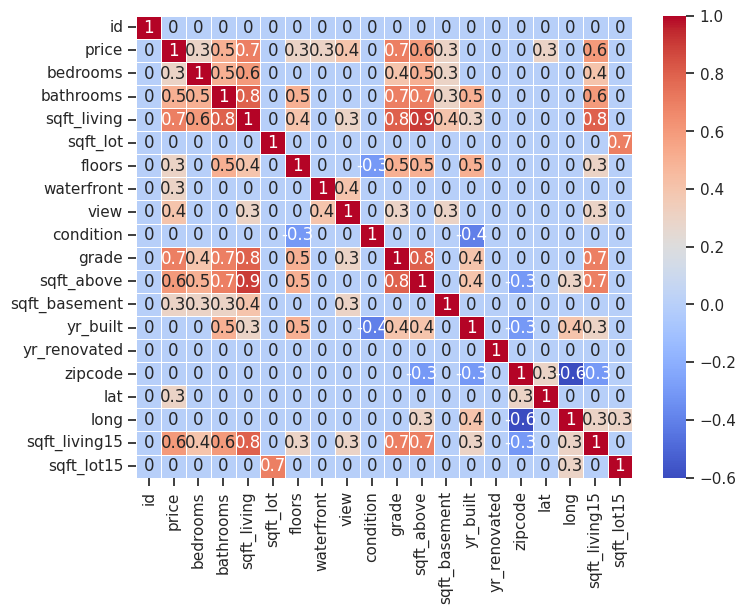

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm');

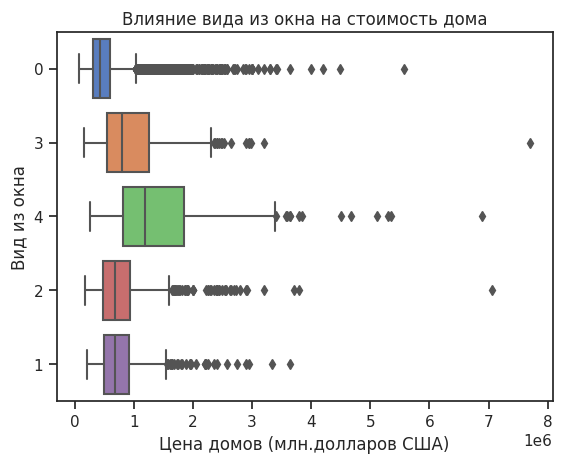

In [ ]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), palette='muted');
plt.xlabel('Цена домов (млн.долларов США)')
plt.ylabel('Вид из окна')
plt.title('Влияние вида из окна на стоимость дома');

Наибольшую медианную стоимость имеют дома с оценкой вида 4, впрочем и размах ценового диапазона у данной категории домов шире.

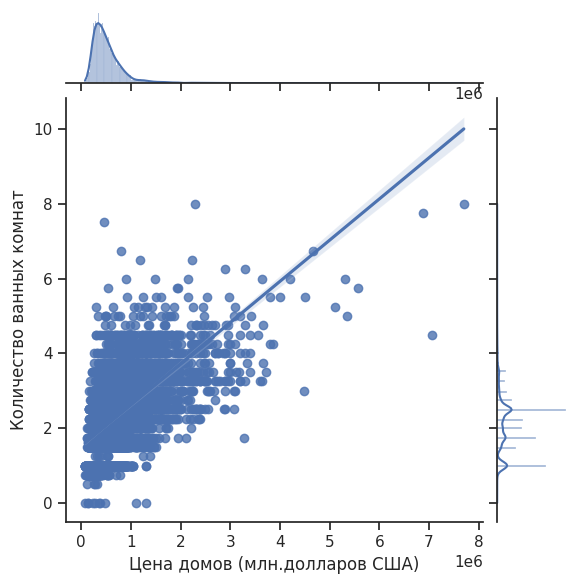

In [ ]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg')
plt.xlabel('Цена домов (млн.долларов США)')
plt.ylabel('Количество ванных комнат');

Количество ванных комнат влияет на стоимость дома.

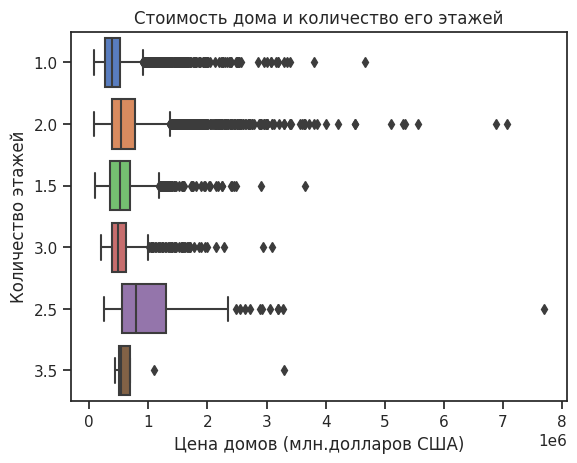

In [ ]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), palette='muted');
plt.xlabel('Цена домов (млн.долларов США)')
plt.ylabel('Количество этажей')
plt.title('Стоимость дома и количество его этажей');

Самая высокая медианная стоимость наблюдается у построек высотой 2,5 этажа, размах стоимости у построек данной этажности так же выше.

Так как диаграмм по стоимости необходимо 5, а соответствующую работу я произвела в первой задаче, ниже продублирую графики и заключения по ним из задачи №1.

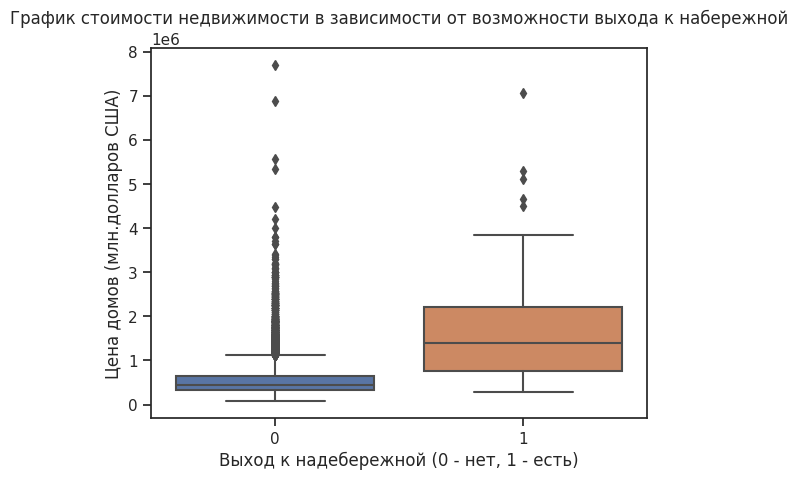

In [ ]:
sns.boxplot(x=df['waterfront'],y=df['price'], whis=1.5)
sns.set_theme(style="whitegrid")
plt.title('График стоимости недвижимости в зависимости от возможности выхода к набережной')
plt.xlabel('Выход к надебережной (0 - нет, 1 - есть)')
plt.ylabel('Цена домов (млн.долларов США)')
plt.show();

В данном случае, можно сделать вывод о том, что стоимость домов не имеющих выхода к набережной значительно ниже стоимости домов, в которых выход к набережной имеется.

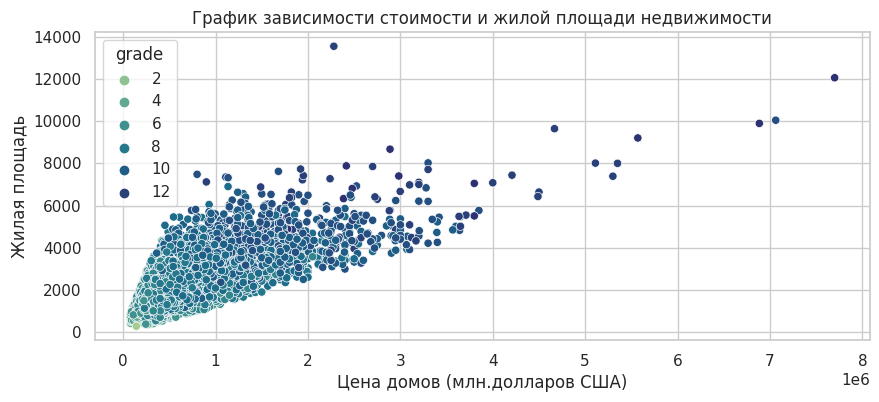

In [ ]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df,
                x='price',
                y='sqft_living',
                hue='grade',
                palette="crest"
                )
plt.title('График зависимости стоимости и жилой площади недвижимости')
plt.xlabel('Цена домов (млн.долларов США)')
plt.ylabel('Жилая площадь')
plt.show();

Очевидно, что чем больше жилая площадь недвижимости и выше класс, тем больше стоит дом.

Спасибо за внимание!